In [1]:
import copy
import japanize_matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
from matplotlib.pyplot import imshow
from numpy.random import randn
from scipy import stats

# 問題93

In [2]:
def gr(X, y, lam):
    p = X.shape[1]
    nu = 1 / np.max(np.linalg.eigvals(X.T @ X))
    beta = np.zeros(p)
    beta_old = np.zeros(p)
    eps = 1
    while eps > 0.001:
        gamma = beta + nu * X.T @ (y - X @ beta)
        beta = max(1 - lam * nu / np.linalg.norm(gamma, 2), 0) * gamma
        eps = np.max(np.abs(beta - beta_old))
        beta_old = copy.copy(beta)
    return beta

In [3]:
import copy as c
def soft_th(lambd, x):
    return np.sign(x) * np.maximum(np.abs(x) - lambd, 0)

In [4]:
def SCoTLASS(lambd, X):
    p = X.shape[1]
    v = np.random.normal(size=p)
    v = v / np.linalg.norm(v, 2)
    for k in range(200):
        u = np.dot(X, v)
        u = u / np.linalg.norm(u, 2)
        v = np.dot(X.T, u)
        v = soft_th(lambd, v)
        size = np.linalg.norm(v, 2)
        if size > 0:
            v = v / size
        else:
            break
    if np.linalg.norm(v, 2) == 0:
        print("vの全要素が0になった")
    return v

In [5]:
n = 100
p = 50
X = np.random.normal(size=n*p).reshape(n, -1)
lambd_seq = np.arange(0, 11) / 10
m = 5
SS = np.zeros((m, 11))
TT = np.zeros((m, 11))
for j in range(m):
    S = list()
    T = list()
    for lambd in lambd_seq:
        v = SCoTLASS(lambd, X)
        S.append(sum(np.sign(v**2)))
        T.append(np.linalg.norm(np.dot(X, v), 2))
    SS[j, :] = S
    TT[j, :] = T

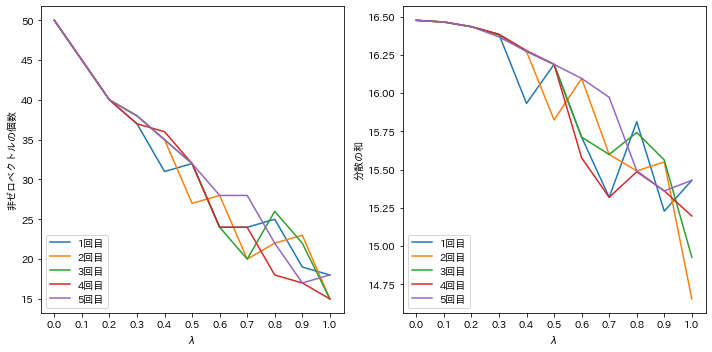

In [6]:
plt.rcParams["font.sans-serif"] = ["SimHei"]   # 日本語を表示するため
plt.rcParams["axes.unicode_minus"] = False     # -を表示するため

# 作図
fig = plt.figure(figsize=(10, 5))
cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# 非ゼロベクトルの個数
plt.subplot(1, 2, 1)
plt.xticks(lambd_seq)
plt.xlabel(r"$\lambda$")
plt.ylabel("非ゼロベクトルの個数")
for j in range(m):
    plt.plot(lambd_seq, SS[j, :], color=cycle[j],
             linestyle="-", label="%d回目" % (j+1))
plt.legend(loc="lower left")

# 分散の和
plt.subplot(1, 2, 2)
plt.xticks(lambd_seq)
plt.xlabel(r"$\lambda$")
plt.ylabel("分散の和")
for j in range(m):
    plt.plot(lambd_seq, TT[j, :], color=cycle[j],
             linestyle="-", label="%d回目" % (j+1))
plt.legend(loc="lower left")
plt.tight_layout()  # 図の重なりを回避

# 問題95

In [7]:
# データ生成
n = 100
p = 5
x = np.random.normal(size=n*p).reshape(-1, p)
lambd_seq = np.arange(0, 11) / 10
lambd = [0.00001, 0.001]
m = 100
g = np.zeros((m, p))

# グラフ表示
g_max = np.max(g)
g_min = np.min(g)
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 日本語を表示するため
plt.rcParams["axes.unicode_minus"] = False    # -を表示するため
fig = plt.figure(figsize=(10, 5))
cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]

<Figure size 720x360 with 0 Axes>

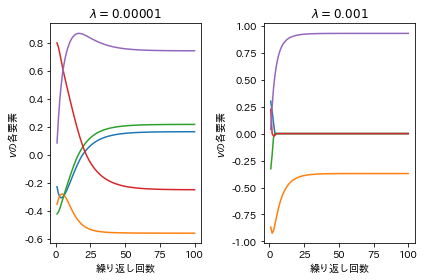

In [8]:
for j in range(p):
    x[:, j] = x[:, j] - np.mean(x[:, j])
for j in range(p):
    x[:, j] = x[:, j] / np.sqrt(np.sum(np.square(x[:, j])))
r = [0] * n
v = np.random.normal(size=p)
for h in range(m):
    z = np.dot(x, v)
    u = np.dot(x.T, z)
    if np.sum(np.square(u)) > 0.00001:
        u = u / np.sqrt(np.sum(np.square(u)))
    for k in range(p):
        m1 = list(np.arange(k))
        n1 = list(np.arange(k+1, p))
        z = m1 + n1
        for i in range(n):
            r[i] = (np.sum(u * x[i, :])
                    - np.sum(np.square(u)) * sum(x[i, z] * v[z]))
        S = np.sum(np.dot(x[:, k], r)) / n
        v[k] = soft_th(lambd[0], S)
    if np.sum(np.square(v)) > 0.00001:
        v = v / np.sqrt(np.sum(np.square(v)))
    g[h, :] = v

# 作図
plt.subplot(1, 2, 1)
plt.title(r"$\lambda = 0.00001$")
plt.xlabel("繰り返し回数")
plt.ylabel("$v$の各要素")
for j in range(p):
    plt.plot(range(1, m+1), g[:, j], color=cycle[j])

# lambda = 0.001
# u,vの計算
for j in range(p):
    x[:, j] = x[:, j] - np.mean(x[:, j])
for j in range(p):
    x[:, j] = x[:, j] / np.sqrt(np.sum(np.square(x[:, j])))
r = [0] * n
v = np.random.normal(size=p)
for h in range(m):
    z = np.dot(x, v)
    u = np.dot(x.T, z)
    if np.sum(np.square(u)) > 0.00001:
        u = u / np.sqrt(np.sum(np.square(u)))
    for k in range(p):
        m1 = list(np.arange(k))
        n1 = list(np.arange(k+1, p))
        z = m1 + n1
        for i in range(n):
            r[i] = np.sum(u * x[i, :]) - np.sum(np.square(u)) * sum(x[i, z] * v[z])
        S = np.sum(np.dot(x[:, k], r)) / n
        v[k] = soft_th(lambd[1], S)
    if np.sum(np.square(v)) > 0.00001:
        v = v / np.sqrt(np.sum(np.square(v)))
    g[h, :] = v

# 作図
plt.subplot(1, 2, 2)
plt.title(r"$\lambda = 0.001$")
plt.xlabel("繰り返し回数")
plt.ylabel("$v$の各要素")
for j in range(p):
    plt.plot(range(1, m+1), g[:, j], color=cycle[j])
plt.tight_layout()  # 図の重なりを回避

# 問題97

## (a)

In [9]:
def kmeans(X, K, w):
    n = X.shape[0]
    p = X.shape[1]
    y = np.random.choice(range(1, K+1), n, replace=True)
    center = np.zeros((K, p))
    for h in range(10):
        for k in range(K):
            if np.sum(y == (k+1)) == 0:
                center[k, :] = np.inf
            else:
                for j in range(p):
                    center[k, j] = np.mean(X[np.where(y == (k+1)), j])
        for i in range(n):
            S_min = np.inf
            for k in range(K):
                if center[k, 1] == np.inf:
                    break
                S = np.sum(np.square(X[i, :] - center[k, :]) * w)
                if S < S_min:
                    S_min = S
                    y[i] = k + 1
    return y

Text(0, 0.5, '$y$')

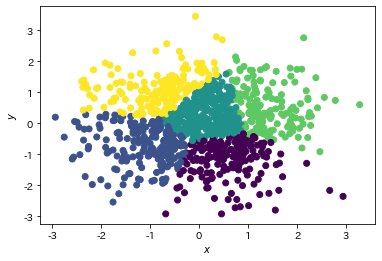

In [10]:
# データの生成
K = 10
p = 2
n = 1000
X = np.random.normal(size=(n, p))
w = [1, 1]
y = kmeans(X, K, w)

# 結果の出力
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xticks(range(-3, 4))
plt.yticks(range(-3, 4))
plt.xlabel("$x$")
plt.ylabel("$y$")

## (b)

In [11]:
def w_a(a, s):
    p = len(a)
    w = [1] * p
    a = a / np.sqrt(sum(np.square(a)))
    if sum(a) < s:
        return a
    lambd = max(a) / 2
    delta = lambd / 2
    for h in range(10):
        for j in range(p):
            w[j] = soft_th(lambd, a[j])
        ww = np.sqrt(sum(np.array(w) ** 2))
        if ww == 0:
            w = 0
        else:
            w = w / ww
        if np.sum(w) > s:
            lambd = lambd + delta
        else:
            lambd = lambd - delta
        delta = delta / 2
    return w

処理の確認

# 問題98

In [12]:
def comp_a(X, y):
    n = X.shape[0]
    p = X.shape[1]
    a = np.zeros(p)
    for j in range(p):
        a[j] = 0
        for i in range(n):
            for h in range(n):
                a[j] = a[j] + np.square(X[i, j] - X[h, j]) / n
        for k in range(K):
            S = 0
            index = np.where(y == k)
            if len(index[0]) == 0:
                break
            for i in index[0]:
                for h in index:
                    S = S + np.square(X[i, j] - X[h, j])
                a[j] = a[j] - S / len(index[0])
    return a

In [13]:
def sparse_kmeans(X, K, s):
    p = X.shape[1]
    w = [1] * p
    for h in range(10):
        y = kmeans(X, K, w)
        a = comp_a(X, y)
        w = w_a(a, s)
    return {'w': w, 'y': y}

In [14]:
p = 10
n = 100
X = np.random.normal(size=(n, p))
sparse_kmeans(X, 5, 1.5)

{'w': array([0.        , 0.11683142, 0.        , 0.42159322, 0.07468079,
        0.89612073, 0.        , 0.        , 0.        , 0.        ]),
 'y': array([4, 4, 4, 4, 2, 2, 2, 2, 3, 1, 5, 2, 1, 4, 1, 1, 5, 3, 1, 4, 5, 4,
        3, 4, 4, 3, 4, 3, 1, 1, 3, 3, 4, 1, 5, 5, 4, 1, 4, 1, 4, 4, 2, 5,
        1, 5, 3, 4, 5, 5, 3, 2, 3, 3, 5, 5, 5, 5, 4, 1, 5, 4, 4, 4, 4, 1,
        1, 2, 1, 4, 1, 1, 4, 5, 5, 3, 4, 4, 3, 4, 4, 3, 5, 4, 4, 1, 3, 4,
        2, 4, 3, 5, 1, 1, 1, 4, 3, 4, 3, 2])}

# 問題99

In [15]:
def ww(x, mu=1, dd=0):
    n = x.shape[0]
    w = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            w[i, j] = np.exp(-mu * sum(np.square(x[i, :] - x[j, :])))
    if dd > 0:
        for i in range(n):
            dis = list()
            for j in range(n):
                dis.append(np.sqrt(np.square(sum(x[i, :] - x[j, :]))))
            index = np.where(np.array(dis) > dd)[0]
            w[i, index] = 0
    return w

In [16]:
def prox(x, tau):
    if sum(np.square(x)) == 0:
        return x
    else:
        return np.maximum(np.array([0]), 1 - tau / np.sqrt(sum(np.square(x)))) * x

In [17]:
def update_u(v, lambd):
    u = np.zeros((n, d))
    z = 0
    m = c.deepcopy(x)
    for i in range(n):
        z = z + m[i, :]
    y = c.deepcopy(x)
    for i in range(n):
        if i < n - 1:
            for j in range(i + 1, n):
                y[i, :] = y[i, :] + lambd[i, j, :] + nu * v[i, j, :]
        if 0 < i:
            for j in range(i - 1):
                y[i, :] = y[i, :] - lambd[j, i, :] - nu * v[j, i, :]
        u[i, :] = (y[i, :] + nu * z) / (n * nu + 1)
    return u

In [18]:
def update_v(u, lambd):
    v = np.zeros((n, n, d))
    for i in range(n - 1):
        for j in range(i + 1, n):
            v[i, j, :] = prox(u[i, :] - u[j, :] - lambd[i, j, :] / nu,
                              gamma * w[i, j] / nu)
    return v

In [19]:
def update_lambda(u, v, lambd):
    for i in range(n - 1):
        for j in range(i + 1, n):
            lambd[i, j, :] = (lambd[i, j, :]
                              + nu * (v[i, j, :] - u[i, :] + u[j, :]))
    return lambd

In [20]:
def convex_cluster():
    v = np.random.normal(size=(n, n, d))
    lambd = np.random.normal(size=(n, n, d))
    for iter in range(max_iter):
        u = update_u(v, lambd)
        v = update_v(u, lambd)
        lambd = update_lambda(u, v, lambd)
    return {"u": u, "v": v}


[1, 2, 1, 1, 1, 3, 4, 1, 5, 6, 7, 7, 1, 3, 1, 8, 2, 9, 1, 10, 3, 7, 1, 1, 1, 1, 3, 7, 1, 4, 3, 2, 2, 2, 11, 1, 1, 1, 12, 1, 13, 8, 3, 2, 2, 1, 14, 1, 1, 5]


Text(0, 0.5, '第2成分')

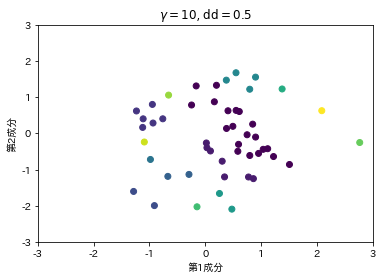

In [21]:
# データ生成
n = 50
d = 2
x = np.random.normal(size=(n, d))

# 凸クラスタリングの実行
w = ww(x, 1, dd=0.5)
gamma = 1  # gamma = 10
nu = 1
max_iter = 1000
v = convex_cluster()["v"]

# 隣接行列の計算
a = np.zeros((n, n))
for i in range(n - 1):
    for j in range(i + 1, n):
        if np.sqrt(sum(np.square(v[i, j, :]))) < 1 / 10 ** 4:
            a[i, j] = 1
            a[j, i] = 1

# 作図
k = 0
y = [0] * n
for i in range(n):
    if y[i] == 0:
        k = k + 1
        y[i] = k
        if i < n - 1:
            for j in range(i + 1, n):
                if a[i, j] == 1:
                    y[j] = k
print(y)
plt.scatter(x=x[:, 0], y=x[:, 1], c=y)
plt.xticks(range(-3, 4))
plt.yticks(range(-3, 4))
plt.title(r"$\gamma = 10$, $\mathrm{dd} = 0.5$")
plt.xlabel("第1成分")
plt.ylabel("第2成分")

凸クラスタリングにおいて最小化すべき目的関数は
$$\frac{1}{2} \sum_{i=1}^{N}\left\|x_{i}-u_{i}\right\|^{2}+\gamma \sum_{i<j} w_{i, j}\left\|u_{i}-u_{j}\right\|_{2}$$
で表すことができ，そのラグランジュ関数は
$$\begin{aligned}
L_{\nu}(U, V, \Lambda):=\frac{1}{2} & \sum_{i \in V}\left\|x_{i}-u_{i}\right\|_{2}^{2}+\gamma \sum_{(i, j) \in E} w_{i, j}\left\|v_{i, j}\right\|+\sum_{(i, j) \in E}\left\langle\lambda_{i, j}, v_{i, j}-u_{i}+u_{j}\right\rangle +\frac{\nu}{2} \sum_{(i, j) \in E}\left\|v_{i, j}-u_{i}+u_{j}\right\|_{2}^{2}
\end{aligned}$$
で与えられる．  
ここで$U,\Lambda$を固定した時に，$V$の最小化は，

$$min_{v_{ij}} \ \ \ \ \ \frac{1}{2}\left\|\frac{1}{\nu}\left(\lambda_{i, j}+\nu v_{i, j}\right)-\left(u_{i}-u_{j}\right)\right\|_{2}^{2}+\frac{\gamma}{\nu} w_{i, j}\left\|v_{i, j}\right\|$$

となるので，$\sigma = \frac{\gamma w_{ij}}{\nu}$として，近接写像を用いて，
$$v_ij = prox_{\sigma \| \cdot \|}(u_i - u_j - \frac{1}{\nu}\lambda_{ij})$$
となるときに，ラグランジュ関数は最小化される．　　
最後にラグランジュ係数の更新は
$$\lambda_{ij} = \lambda_{ij} + \nu(v_{ij} - u_i + u_j)$$  
によって更新することで凸クラスタリングを行うことができる．

# 問題100

In [22]:
 def s_update_u(G, G_inv, v, lambd):
    u = np.zeros((n, d))
    y = c.deepcopy(x)
    for i in range(n):
        if i < n - 1:
            for j in range(i + 1, n):
                y[i, :] = y[i, :] + lambd[i, j, :] + nu * v[i, j, :]
        if 0 < i:
            for j in range(i - 1):
                y[i, :] = y[i, :] - lambd[j, i, :] - nu * v[j, i, :]
    for j in range(d):
        u[:, j] = gr(G, np.dot(G_inv, y[:, j]), gamma_2 * r[j])           
    for j in range(d):
        u[:, j] = u[:, j] - np.mean(u[:, j])
    return u

In [23]:
def s_convex_cluster():
    G = (np.sqrt(1 + n * nu) * np.diag(n * [1])
         - (np.sqrt(1 + n * nu) - 1) / n * np.ones((n, n)))
    G_inv = (1 / np.sqrt(1 + nu * n)
             * (np.diag(n * [1]) + np.sqrt(1 + n * nu) - 1)
             / n * np.ones((n, n)))
    v = np.random.normal(size=(n, n, d))
    u = 0
    lambd = np.random.normal(size=(n, n, d))
    for iter in range(max_iter):
        u = s_update_u(G, G_inv, v, lambd)
        v = update_v(u, lambd)
        lambd = update_lambda(u, v, lambd)
    return u, v

In [24]:
# データ生成
n = 50
d = 10
x = np.random.normal(size=(n, d))

# 実行前の設定
w = ww(x, 1 / d, dd=np.sqrt(d))
gamma = 10
nu = 1
max_iter = 1000
r = np.array([1] * d)

# gamma_2を変えて実行し，係数の値をグラフで表示
gamma_2_seq = np.arange(1, 11, 1)
m = len(gamma_2_seq)
z = np.zeros((m, d))
h = 0
for gamma_2 in gamma_2_seq:
    u, v = s_convex_cluster()
    for j in range(d):
        z[h, j] = u[4, j]
    h = h + 1
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 日本語を表示するため
plt.rcParams["axes.unicode_minus"] = False    # -を表示するため
cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]

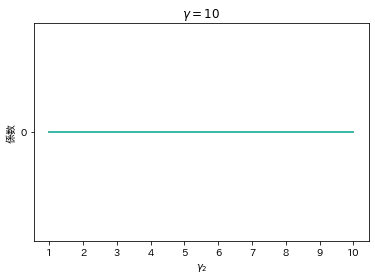

In [25]:
plt.title(r"$\gamma = 10$")
plt.xlabel(r"$\gamma_2$")
plt.ylabel("係数")
plt.xticks(range(1, 11))
plt.yticks(range(-2, 3))
for j in range(d):
    plt.plot(gamma_2_seq, z[:, j], color=cycle[j])
plt.show()

凸クラスタリングにスパース性を取り入れたスパース凸クラスタリングはグループLasso同様に$u_i$の2ノルム正則化項を加えることでラグランジュ関数を
$$\begin{aligned}
L_{\nu}(U, V, \Lambda):=\frac{1}{2} & \sum_{j=1}^{p}\left\|x^{(j)}-u^{(j)}\right\|_{2}^{2}+\gamma_{1} \sum_{(i, k) \in E} w_{i, k}\left\|v_{i, k}\right\|+\gamma_{2} \sum_{j=1}^{p} r_{j}\left\|u^{(j)}\right\|_{2} +\sum_{(i, k) \in E}\left\langle\lambda_{i, k}, v_{i, k}-u_{i}+u_{k}\right\rangle+\frac{\nu}{2} \sum_{(i, k) \in E}\left\|v_{i, k}-u_{i}+u_{k}\right\|_{2}^{2}
\end{aligned}$$

と表すことができる．  
そのため，uを更新するときには四章で扱ったグループLassoの処理を入れる必要が生じる．  
また，先ほど同様に$V,\Lambda$の値を所与とした場合に$u$を最小化する問題は
$$\frac{1}{2}\left\|G^{-1} y^{(j)}-G u^{(j)}\right\|_{2}^{2}+\gamma_{2} r_{j}\left\|u^{(j)}\right\|_{2}$$
を最小にする$u$を求めれば良いのでこの計算中で必要になる
$$G:=\sqrt{1+N \nu} I_{N}-\frac{\sqrt{1+N \nu}-1}{N} E_{N}$$  
やその逆行列の計算式が問題99とは異なる．